<a href="https://colab.research.google.com/github/seiside/LECNEP/blob/main/plot_pwave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install obspy
!pip install obspy
# after installing obspy, you may need "restart runtime"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.3 MB 5.3 MB/s 


In [1]:
#load obspy modules
import obspy
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

In [4]:
#download waveform data from IRIS server
client = Client("IRIS")
t = UTCDateTime("2018-08-19T00:19:40")  #Example: Mw8.2 Fiji 600km-depth earthquake
st = client.get_waveforms("IU","MAJO","00","BHZ",t+550,t+700,attach_response=True)  #JMA Matsushiro Obs. time window is selected for P-wave
st.remove_response(output="DISP", water_level=70)  #setting of water level is a little tricky part

1 Trace(s) in Stream:
IU.MAJO.00.BHZ | 2018-08-19T00:28:50.019538Z - 2018-08-19T00:31:19.969538Z | 20.0 Hz, 3000 samples

No handles with labels found to put in legend.


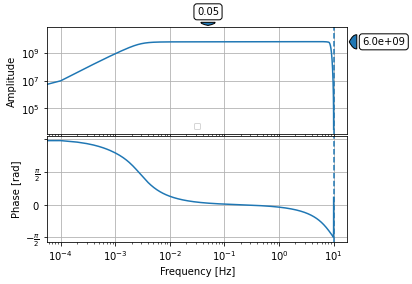

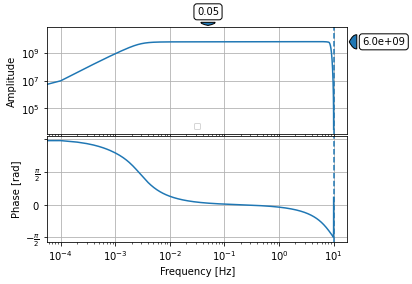

In [5]:
#check the response removed 
st[0].stats.response.plot(0.0001,output="VEL")

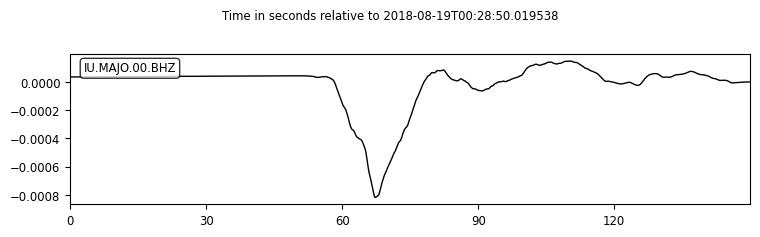

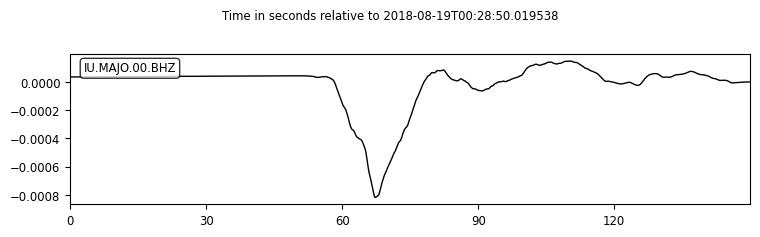

In [6]:
#plot the waveform, relative to the start time of the downloaded data
st.plot(tick_format="%.2f",type="relative")